Imports and file system

In [1]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# create directories
data_folder = os.path.abspath(os.path.join(os.path.join(os.getcwd(), ".."), "BitBrains_Dataset"))
rnd_folder = os.path.abspath(os.path.join(data_folder, "rnd"))
fastStorage_folder = os.path.abspath(os.path.join(data_folder, "fastStorage"))

Parameters: choose dataset

In [2]:
machine = 976

In [7]:
df_subset.head

<bound method NDFrame.head of      Timestamp [ms];\tCPU cores;\tCPU capacity provisioned [MHZ];\tCPU usage [MHZ];\tCPU usage [%];\tMemory capacity provisioned [KB];\tMemory usage [KB];\tDisk read throughput [KB/s];\tDisk write throughput [KB/s];\tNetwork received throughput [KB/s];\tNetwork transmitted throughput [KB/s]
0     1376314846;\t4;\t11703.99824;\t10912.027692426...                                                                                                                                                                                                                                            
1     1376315146;\t4;\t11703.99824;\t10890.57036232;...                                                                                                                                                                                                                                            
2     1376315446;\t4;\t11703.99824;\t10434.11443096;...                                       

Import dataset

In [8]:
df = pd.read_csv(os.path.join(data_folder, "1.csv"), ";\t")
#df = pd.read_pickle(os.path.join(data_folder, "rnd_raw_data.pckl"))

df_subset = df
df_subset['datetime'] = df_subset["Timestamp [ms]"].apply(dt.fromtimestamp)
df_subset = df_subset.sort_values(axis = 0, by = "datetime").set_index(['datetime']).drop('Timestamp [ms]', axis = 1)

print(f"Columns:\n{df.columns}")
#df_subset.info()
df_subset.describe()
#df_subset.head()

Columns:
Index(['Timestamp [ms]', 'CPU cores', 'CPU capacity provisioned [MHZ]',
       'CPU usage [MHZ]', 'CPU usage [%]', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]', 'Disk read throughput [KB/s]',
       'Disk write throughput [KB/s]', 'Network received throughput [KB/s]',
       'Network transmitted throughput [KB/s]', 'datetime'],
      dtype='object')


C:\Users\XL892PG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\XL892PG\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,8634.0,8.634000e+03,8634.000000,8634.000000,8634.0,8.634000e+03,8634.000000,8634.000000,8634.000000,8634.000000
mean,4.0,1.170400e+04,470.808807,4.022632,67108864.0,3.968319e+05,9.068713,412.470582,12.548241,2.982650
std,0.0,1.295195e-09,1978.426530,16.903852,0.0,2.072866e+06,149.350246,2439.051168,139.738027,32.803417
min,4.0,1.170400e+04,58.519991,0.500000,67108864.0,0.000000e+00,0.000000,0.285714,0.000000,0.928571
25%,4.0,1.170400e+04,66.322657,0.566667,67108864.0,0.000000e+00,0.000000,0.600000,0.000000,1.000000
50%,4.0,1.170400e+04,72.174656,0.616667,67108864.0,0.000000e+00,0.000000,0.666667,0.000000,1.000000
75%,4.0,1.170400e+04,78.026655,0.666667,67108864.0,0.000000e+00,0.000000,1.000000,0.000000,1.000000
max,4.0,1.170400e+04,11454.312944,97.866667,67108864.0,3.632826e+07,8544.733333,56630.600000,3563.800000,1022.666667


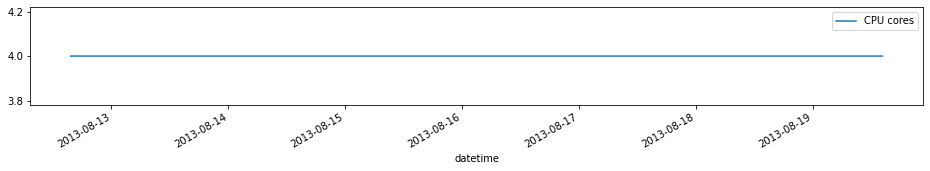

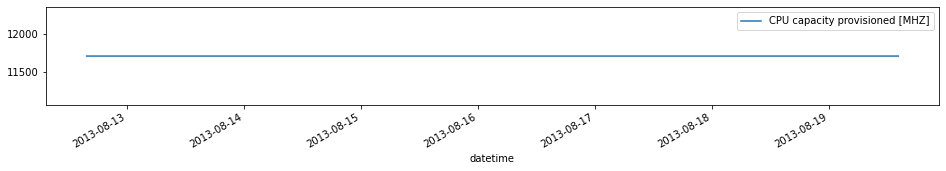

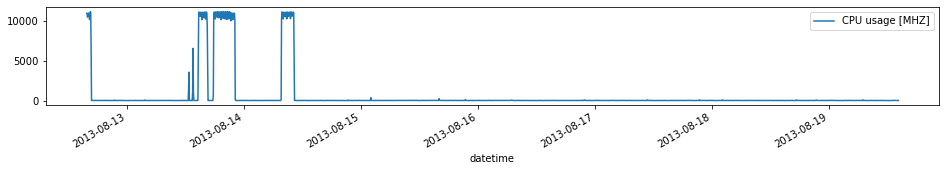

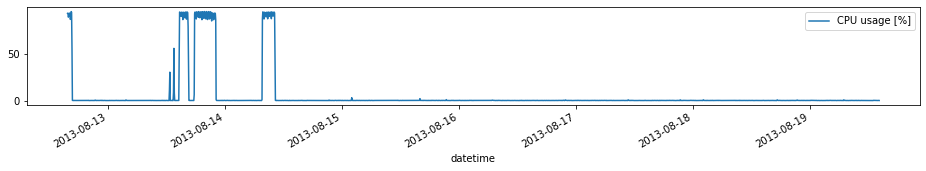

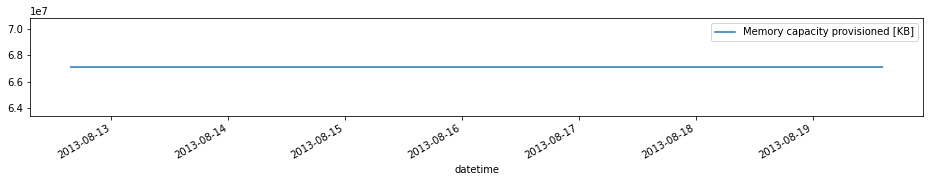

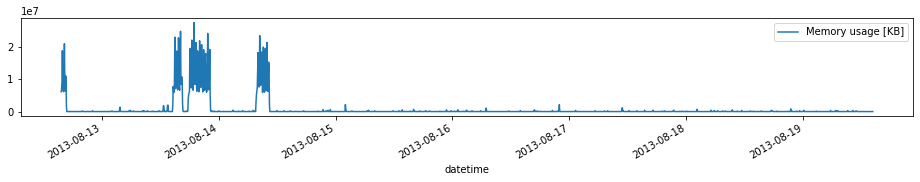

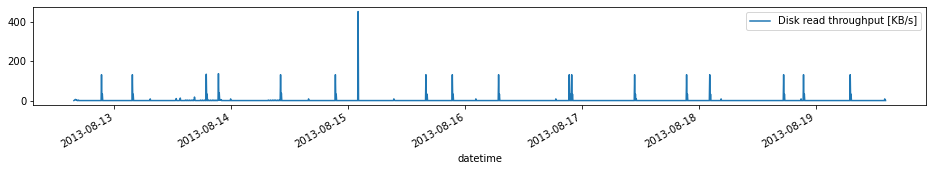

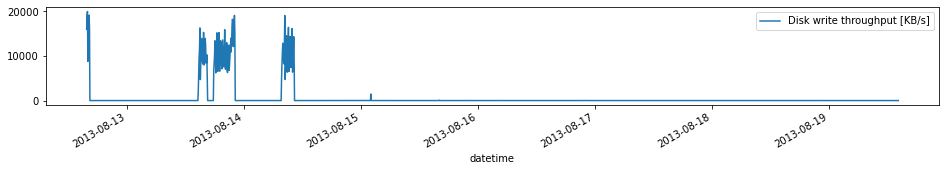

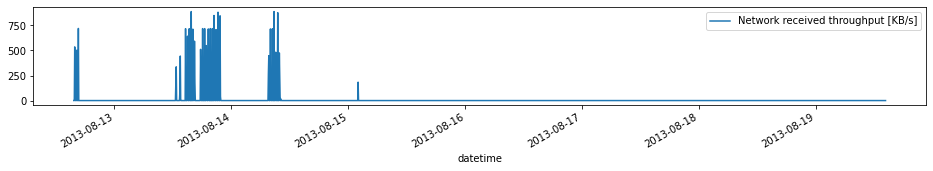

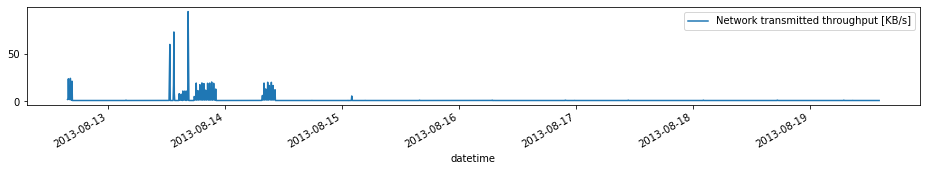

In [9]:
for c in df_subset.columns:
    df_subset[:2000].plot.line(y = c, figsize = (16, 2))

Resample dataset:
- 1 measure every 5 minutes: basic dataset
- 1 measure every 15 minutes: for SARIMA model

In [10]:
df_5mn = df_subset.groupby([pd.Grouper(level = 'datetime', freq = '5min')]).max()
df_5mn.index.freq = '5min'
df_5mn.head(3)

df_15mn = df_subset.groupby([pd.Grouper(level = 'datetime', freq = '15min')]).max()
df_15mn.index.freq = '15min'
df_15mn.head(3)

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
datetime,,,,,,,,,,
2013-08-12 15:30:00,4,11703.99824,10912.027692,93.233333,67108864.0,6.129274e+06,0.133333,15981.600000,0.000000,2.133333
2013-08-12 15:45:00,4,11703.99824,10890.570362,93.050000,67108864.0,1.879048e+07,5.466667,19974.933333,535.666667,23.933333
2013-08-12 16:00:00,4,11703.99824,10951.041020,93.566667,67108864.0,9.305761e+06,5.400000,19182.866667,0.000000,2.600000


## Univariate analysis

### ETS Decomposition

What is ETS decomposition?
ETS stands for Error-Trend-Seasonality and is a model used for the time series decomposition. It decomposes the series into the error, trend and seasonality component. It is a univariate forecasting model used when dealing with time-series data. It focuses on trend and seasonal components

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_15mn['CPU usage [%]'], model='additive', period = 1/(24*12))  # model='add' also works
fig = result.plot()
fig.set_size_inches((16, 10))

ValueError: v cannot be empty

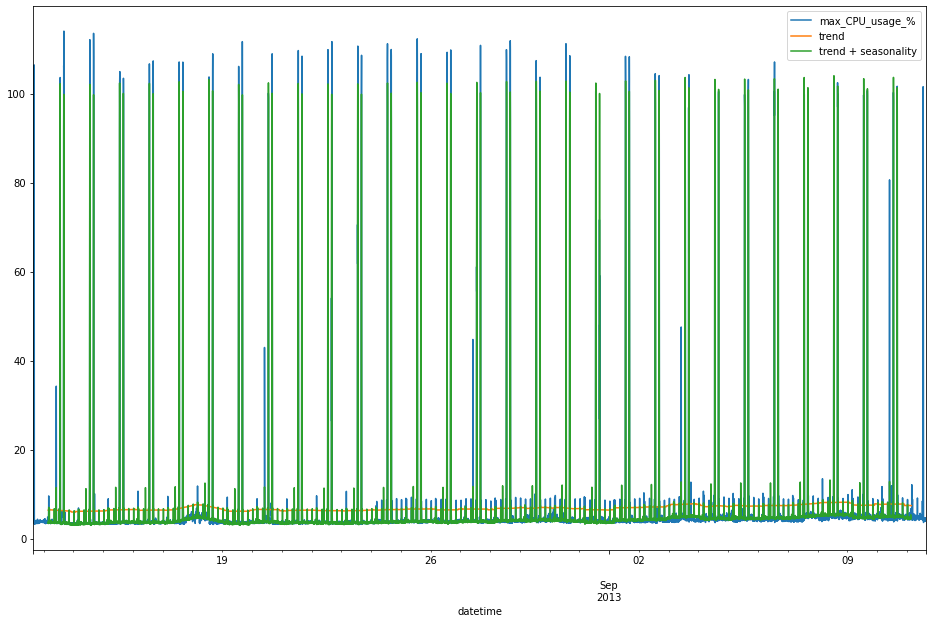

In [7]:
test = result.trend + result.seasonal
df_5mn['CPU usage [%]'].plot(figsize = (16, 10), label = 'max_CPU_usage_%')
result.trend.plot(label = 'trend')
test.plot(label = 'trend + seasonality')
plt.legend()

#### Test Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# root mean squared error. error = rmse(test, predictions)
# compare the rmse to the mean of the test dataset (proportionnaly)
#from statsmodels import tqdm
import warnings
warnings.filterwarnings('ignore')

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(df_5mn['CPU usage [%]'], 'Stationarity test') # no upward / downward trends

Augmented Dickey-Fuller Test: Stationarity test
ADF test statistic     -1.035683e+01
p-value                 2.454225e-18
# lags used             3.700000e+01
# observations          8.602000e+03
critical value (1%)    -3.431110e+00
critical value (5%)    -2.861876e+00
critical value (10%)   -2.566949e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


============ Choose Training size and prediction range =============

In [16]:
training_period = 14 # days
prediction_range = 24 # hours
dataset_grain = 5 # minutes

==========================================================

In [20]:
training_size = int(training_period *24 *(60/dataset_grain))
test_size = int(prediction_range *(60/dataset_grain))

df_train = df_5mn[:training_size]
df_test = df_5mn[training_size:training_size + test_size]

print(f"{len(df_train)} measures of training data ({round((len(df_train)/len(df_5mn))*100)}%)")
print(f"containing dates from {df_train.index.min()} to {df_train.index.max()}")
print(f"{len(df_test)} measures of testing data ({round((len(df_test)/len(df_5mn))*100)}%)")
print(f"containing dates from {df_test.index.min()} to {df_test.index.max()}")

4032 measures of training data (47%)
containing dates from 2013-08-12 15:40:00 to 2013-08-26 15:35:00
288 measures of testing data (3%)
containing dates from 2013-08-26 15:40:00 to 2013-08-27 15:35:00


#### Exponential Smoothing - Holt-Winters

Text(0.5, 1.0, 'Predictions for the next {prediction_range} hours')

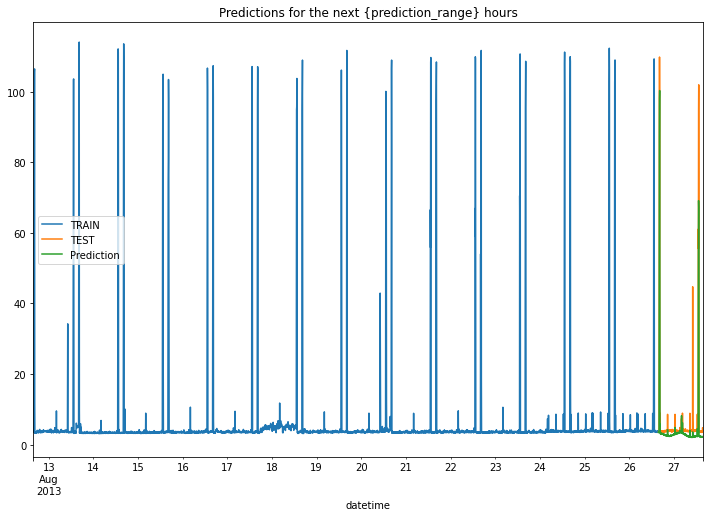

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(df_train['CPU usage [%]'],
                                    trend = 'mul',
                                    seasonal = 'mul',
                                    seasonal_periods = 24*12).fit()
test_predictions = fitted_model.forecast(test_size).rename('HW Forecast')

# plot results
df_train['CPU usage [%]'].plot(legend=True, label='TRAIN')
df_test['CPU usage [%]'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend = True, label = 'Prediction')
plt.title("Predictions for the next {prediction_range} hours")

<span style="color: red;">==> Add **MSE** / other metric to **quantify the model performance**</span>

### "Baseline" model: (S)ARIMA

Find the best parameters for the model

take the dataset with 1 measure / 15 min to facilitate model training

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

============ Choose Training size and prediction range =============

In [9]:
training_period = 14 # days
prediction_range = 24 # hours
dataset_grain = 15 # minutes

==========================================================

In [10]:
# Seasonality: determine the number of observations in a season
m = int(24 *(60/dataset_grain))
print(f"{m} rows in a period")

96 rows in a period


In [14]:
from pmdarima import auto_arima # easier order selection than built in statsmodels

stepwise_fit = auto_arima(df_15mn['CPU usage [%]'], seasonal = True, trace = True, m = m) #, m = 24*12
# m = number of data points (rows) in each seasonal cycle
# ex: 1 row / month with yearly seasonality: m = 12 (rows per season)
# here: 1 row/ 5 min, daily seasonality: m = 12*24 rows per season
stepwise_fit.summary()

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [15]:
training_size = int(training_period *24 *(60/dataset_grain))
test_size = int(prediction_range *(60/dataset_grain))

df_train = df_15mn[:training_size]
df_test = df_15mn[training_size:training_size + test_size]

print(f"{len(df_train)} measures of training data ({round((len(df_train)/len(df_15mn))*100)}%)")
print(f"containing dates from {df_train.index.min()} to {df_train.index.max()}")
print(f"{len(df_test)} measures of testing data ({round((len(df_test)/len(df_15mn))*100)}%)")
print(f"containing dates from {df_test.index.min()} to {df_test.index.max()}")

1344 measures of training data (47%)
containing dates from 2013-08-12 15:30:00 to 2013-08-26 15:15:00
96 measures of testing data (3%)
containing dates from 2013-08-26 15:30:00 to 2013-08-27 15:15:00


In [ ]:
model = SARIMAX(df_train['CPU usage [%]'], order = (5, 0, 2), seasonal_order = (1, 0, 2, m))
model_fit = model.fit(disp = False)

# Obtain predicted values for a time range as long as the test data set
print(f"Evaluate several {len(df_test)} measures ahead")
start = len(df_train)
end = len(df_train) + len(df_test) - 1
predictions = model_fit.predict(start = start, end = end,
                              dynamic = False, typ = 'levels').rename('ARIMA(0,1,0) Predictions')

plt.figure(figsize = (16, 10))
plt.title(f"predicted values {prediction_range} days in advance")
plt.plot(df_test['CPU usage [%]'], label = 'Original')
plt.plot(predictions, label = 'SARIMAX')
plt.legend()

apply the model on a longer sequence (always train on the N past days and test on the x coming hours)

<span style="color: red;">Part to build with the right period for seasonality and on 15' dataframe (so that it runs quicker...) </span>

In [52]:
index = len(df_train)
yhat_next = list()
t = test_size # the dataset has to organized 1 value sampled every 5 minutes

for t in range(0, len(df_agg_avg), test_size):
    #if t%24 == 0 :print(f"{t}/{len(df_test)}")
    
    temp_train = df_agg_avg[:len(df_train) + t]
    print(f"t: {t} - training on {temp_train.index.min()} - {temp_train.index.max()}")
    
    model = SARIMAX(temp_train['CPU usage [%]'],
                    order = (5, 0, 2),
                    seasonal_order = (0, 0, 0, 0))
    model_fit = model.fit(disp = False)
    predictions = model_fit.predict(start = len(temp_train),
                                    end = len(temp_train),
                                    dynamic = False)
    print(f"predictions: {predictions.index.min()} - {predictions.index.max()}")
    yhat_next = yhat_next + [predictions]

yhat_next = pd.concat(yhat_next)

t: 0 - training on 2013-08-12 15:40:00 - 2013-08-17 15:35:00
predictions: 2013-08-17 15:40:00 - 2013-08-17 15:40:00
t: 288 - training on 2013-08-12 15:40:00 - 2013-08-18 15:35:00
predictions: 2013-08-18 15:40:00 - 2013-08-18 15:40:00
t: 576 - training on 2013-08-12 15:40:00 - 2013-08-19 15:35:00
predictions: 2013-08-19 15:40:00 - 2013-08-19 15:40:00
t: 864 - training on 2013-08-12 15:40:00 - 2013-08-20 15:35:00
predictions: 2013-08-20 15:40:00 - 2013-08-20 15:40:00
t: 1152 - training on 2013-08-12 15:40:00 - 2013-08-21 15:35:00
predictions: 2013-08-21 15:40:00 - 2013-08-21 15:40:00
t: 1440 - training on 2013-08-12 15:40:00 - 2013-08-22 15:35:00
predictions: 2013-08-22 15:40:00 - 2013-08-22 15:40:00
t: 1728 - training on 2013-08-12 15:40:00 - 2013-08-23 15:35:00
predictions: 2013-08-23 15:40:00 - 2013-08-23 15:40:00
t: 2016 - training on 2013-08-12 15:40:00 - 2013-08-24 15:35:00
predictions: 2013-08-24 15:40:00 - 2013-08-24 15:40:00
t: 2304 - training on 2013-08-12 15:40:00 - 2013-08-25

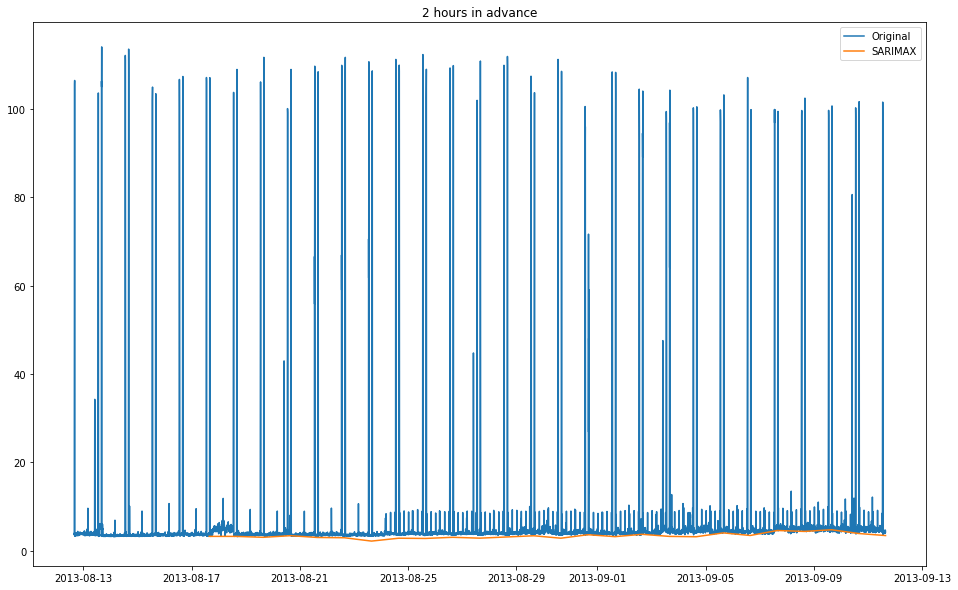

In [54]:
plt.figure(figsize = (16, 10))
plt.title('2 hours in advance')
plt.plot(df_agg_avg['CPU usage [%]'], label = 'Original')
plt.plot(yhat_next, label = 'SARIMAX')
#plt.plot(yhat_next2h, label = 'SARIMAX, 2h in advance')
#plt.plot(yhat_next3h, label = 'SARIMAX, 3h in advance')
#plt.plot(yhat_next4h, label = 'SARIMAX, 4h in advance')
#plt.plot(yhat_next6h, label = 'SARIMAX, 6h in advance')
plt.legend()

### Vecto Auto-regression (VAR)